In [0]:
import matplotlib.pyplot as plt
import pandas as pd 
from google.colab import files
uploaded = files.upload()zz


Saving wine.csv to wine (3).csv


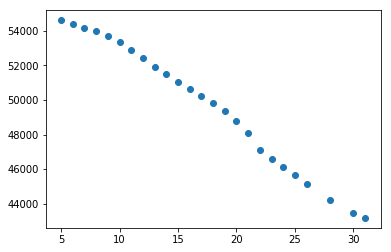

In [0]:
import seaborn as sns
wine = pd.read_csv("wine.csv")
plt.scatter(wine["Age"],wine["FrancePop"])

# g = sns.pairplot(wine)


# Sample Size
Here we observe how changing the number of samples affects the regression line. Using too few points, whilst appearing to be a good fit, may miss the trend observed in the population. As the sample increases the trend approaches that of the population and we can see here that at 30 samples the model is similar to that with 1000 samples.

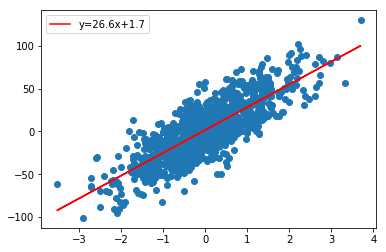

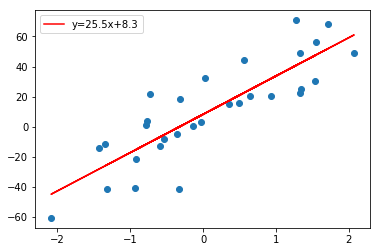

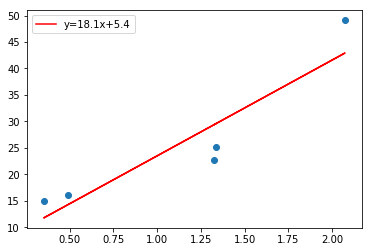

In [0]:
#Seeing how regression changes with sample size
X1, y1 = make_regression(n_samples=1000, n_features=1, noise=20)
X2 = X1[0:30,0]
y2 = y1[0:30]
X3 = X1[0:5,0]
y3 = y1[0:5]

plotme(X1[:,0],y1)
plotme(X2, y2)
plotme(X3, y3)

# Outliers
Here we are going to look at how different types of outliers can affect a linear regression and how we can diagnose them.

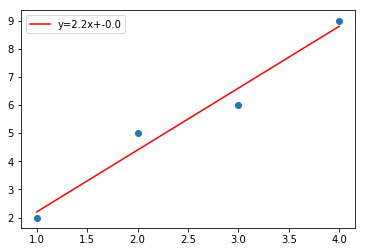

In [0]:

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
# generate regression dataset
X = np.array([1,2,3,4])
y = np.array([2,5,6,9])
# plot regression dataset
def plotme(X,y):
  plt.scatter(X,y)
  z = np.polyfit(X, y, 1)
  p = np.poly1d(z)
  plt.plot(X,p(X),"r", label='y={0:.1f}x+{1:.1f}'.format(z[0], z[1]))
  plt.legend(loc='upper left')
  plt.show()
  
plotme(X,y)

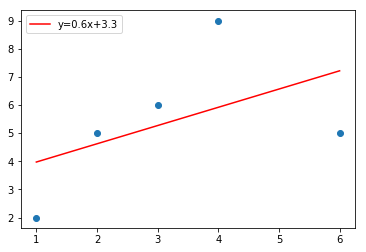

In [0]:
#Add outlier
X1 = np.append(X,[6])
y1 = np.append(y,[5])

# plot regression dataset
plotme(X1,y1)

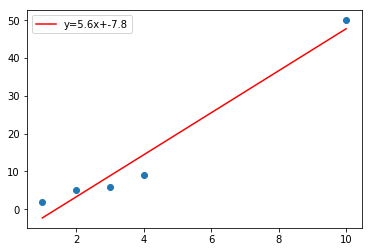

In [0]:
#Add outlier high leverage
X2 = np.append(X,[10])
y2 = np.append(y,[50])

# plot regression dataset
plotme(X2, y2)

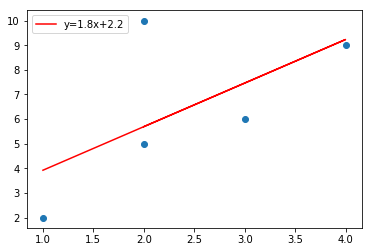

In [0]:
#Add outlier low leverage
X3 = np.append(X,[2])
y3 = np.append(y,[10])

# plot regression dataset
plotme(X3, y3)

The first thing we look at is the leverage of the point. This is the distance along the x-axis the point is from the centre of the points.

In [0]:
#Calculate the leverage of points where X is the design matrix

def leverage(X,point):
  if X.shape == (len(X),1):
    X_ = np.matrix(X)
    intercept = np.ones((X_.shape[0],1))
    D = np.append(intercept,X_, axis=1)
    H = D@np.linalg.inv(D.T@D)@D.T
  else:
    X_ = np.matrix(X).T
    intercept = np.ones((X_.shape[0],1))
    D = np.append(intercept,X_, axis=1)
    H = D@np.linalg.inv(D.T@D)@D.T
  return H[point,point]

print('Leverage:',leverage(X,3))
print('Leverage:',leverage(X1,4))
print('Leverage:',leverage(X2,4))
print('Leverage:',leverage(X3,4))



Leverage: 0.7000000000000002
Leverage: 0.7297297297297297
Leverage: 0.9199999999999999
Leverage: 0.23076923076923062


Next we look at the residual of the potential outlier to see the distance from the expected value. We can also look at studentized residuals which are normalized to make them easier to interpret. Finally we test the influence of the point by looking at its Cook's distance and then determine how we think best to deal with the outlier.

In [0]:
# Calculate the residuals of the points

def residual(x,y, point):
  if x.shape == (len(x),1):
    z = np.polyfit(x[:,0], y, 1)
    p = np.poly1d(z)
    err = y[point] - p(x)[point]
    
  else:
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    err = y[point] - p(x)[point]
  return err

def MSE(x,y):
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  mse = sum((y-p(x))**2)/len(x)
  return mse

def std_resid(x,y,point):
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  resid = residual(x,y, point)
  mse = MSE(x,y)
  H = leverage(x,point)
  std_r = resid/(mse*(1-H))**0.5
  return std_r

def cooks(x,y,point):
  x_rem = np.delete(x, point)
  y_rem = np.delete(y, point)
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  z_rem = np.polyfit(x_rem, y_rem, 1)
  p_rem = np.poly1d(z_rem)
  
  temp = MSE(x,y)/(2*sum((y_rem-p_rem(x_rem))**2))
  return temp
  

#Diagnostics for non-outlying point  
print('Residual:',residual(X,y,3))
print('Studentized Residual:',std_resid(X,y,3))
print('Cooks Distance:',cooks(X,y,3))
print()
#Diagnostics for different outlying points 
print('Residual:',residual(X1,y1,4))
print('Studentized Residual:',std_resid(X1,y1,4))
print('Cooks Distance:',cooks(X1,y1,4))
print()
print('Residual:',residual(X1,y1,4))
print('Studentized Residual:',std_resid(X2,y2,4))
print('Cooks Distance:',cooks(X2,y2,4))
print()
print('Residual:',residual(X1,y1,4))
print('Studentized Residual:',std_resid(X3,y3,4))
print('Cooks Distance:',cooks(X3,y3,4))


Residual: 0.20000000000000107
Studentized Residual: 0.8164965809277305
Cooks Distance: 0.15000000000000005

Residual: -2.216216216216216
Studentized Residual: -2.1884181020028572
Cooks Distance: 2.37162162162162

Residual: -2.216216216216216
Studentized Residual: 2.221942327741332
Cooks Distance: 7.939999999999996

Residual: -2.216216216216216
Studentized Residual: 2.1998877636914815
Cooks Distance: 3.1153846153846136


In [0]:
#How would you remove the above outliers?

In [0]:
# DISTRIBUTION PLOTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')

# Load dataset from scikitlearn
from sklearn.datasets import load_boston
bostonRaw = load_boston() # bostonRaw is a dict

data = bostonRaw.data  # extract data
colName = bostonRaw.feature_names  # feature_names are the column names
target = bostonRaw.target  

# Place numpy array into a dataframe
X = pd.DataFrame(data, columns=colName)
Y = pd.DataFrame(target)

# Fit model and predict
model = LinearRegression()
model = model.fit(X,Y)
predict = model.predict(X) # numpy array


Text(0.5, 1.0, 'Residual vs Fitted Plot')

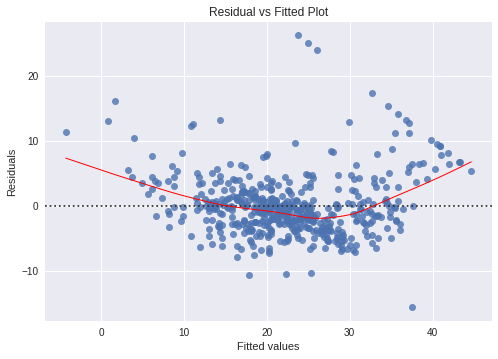

In [0]:
# Creating residual vs fitted plot
sns.residplot(predict.reshape(-1),'target', data=bostonRaw, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1})

# reshape(-1) turns predict from a column into a row vector
# 'target' is name of column in dataframe
# data=bostonRaw tells it what dataframe to use
# Fit a lowess smoother to the residual scatterplot.
  # Lowess stands for "Locally Weighted Scatterplot Smoothing" aka trend line
# line_kws are line formatting parameters

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual vs Fitted Plot')

Ideally, we want random scatter with horizonal red line.

What we really see is a bow shape, meaning that there are non-linear relationships that we haven't captured with a linear regression.

We can attempt to fix this with a transformation.


Text(0, 0.5, 'Residuals')

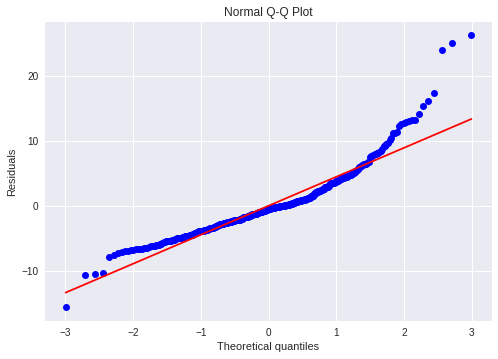

In [0]:
# QQ Plot
residuals = target - predict.reshape(-1) # definition of residuals
stats.probplot(residuals, dist="norm", plot=plt)
# probplot from scipy stats library

# From documentation:
# Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default)
# plot = plt means plot with matplotlib's plt

plt.title("Normal Q-Q Plot")
plt.ylabel("Residuals")

Ideally, we want all residuals along the red line.

What we really see is a lot of points towards the end deviating from the red line, which indicates that the residuals are not normally distributed and has many extreme values on the tails.

Text(0.5, 1.0, 'Scale Location Plot')

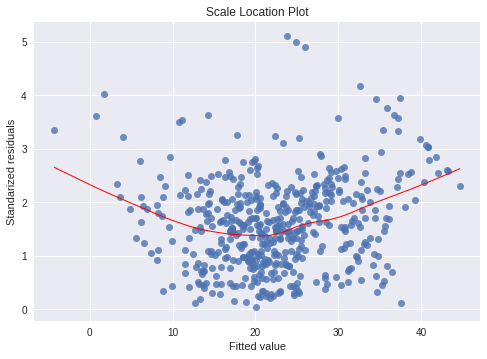

In [0]:
# Scale Location Plot

# Change the y-axis to sqrt(abs(residuals))
# Scaling residuals to measure variance
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

# From documentation: Plot data and a linear regression model fit
sns.regplot(predict.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1})


plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale Location Plot")

Ideally, we want a horizontal line which indicates that the data is homoscedastic, aka variance of the residuals remains constant.

What we really see is that the ends of the graph have very high values, which means that there are non-linear relationships in the model since the model is not constant.

# **Multicollinearity**
in this demo we will calculate a Variance Inflation Factor

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files 
uploaded = files.upload()

Saving wine.csv to wine (2).csv


In [0]:
wine = pd.read_csv("wine.csv")
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


Try to see some relations between the independent variables

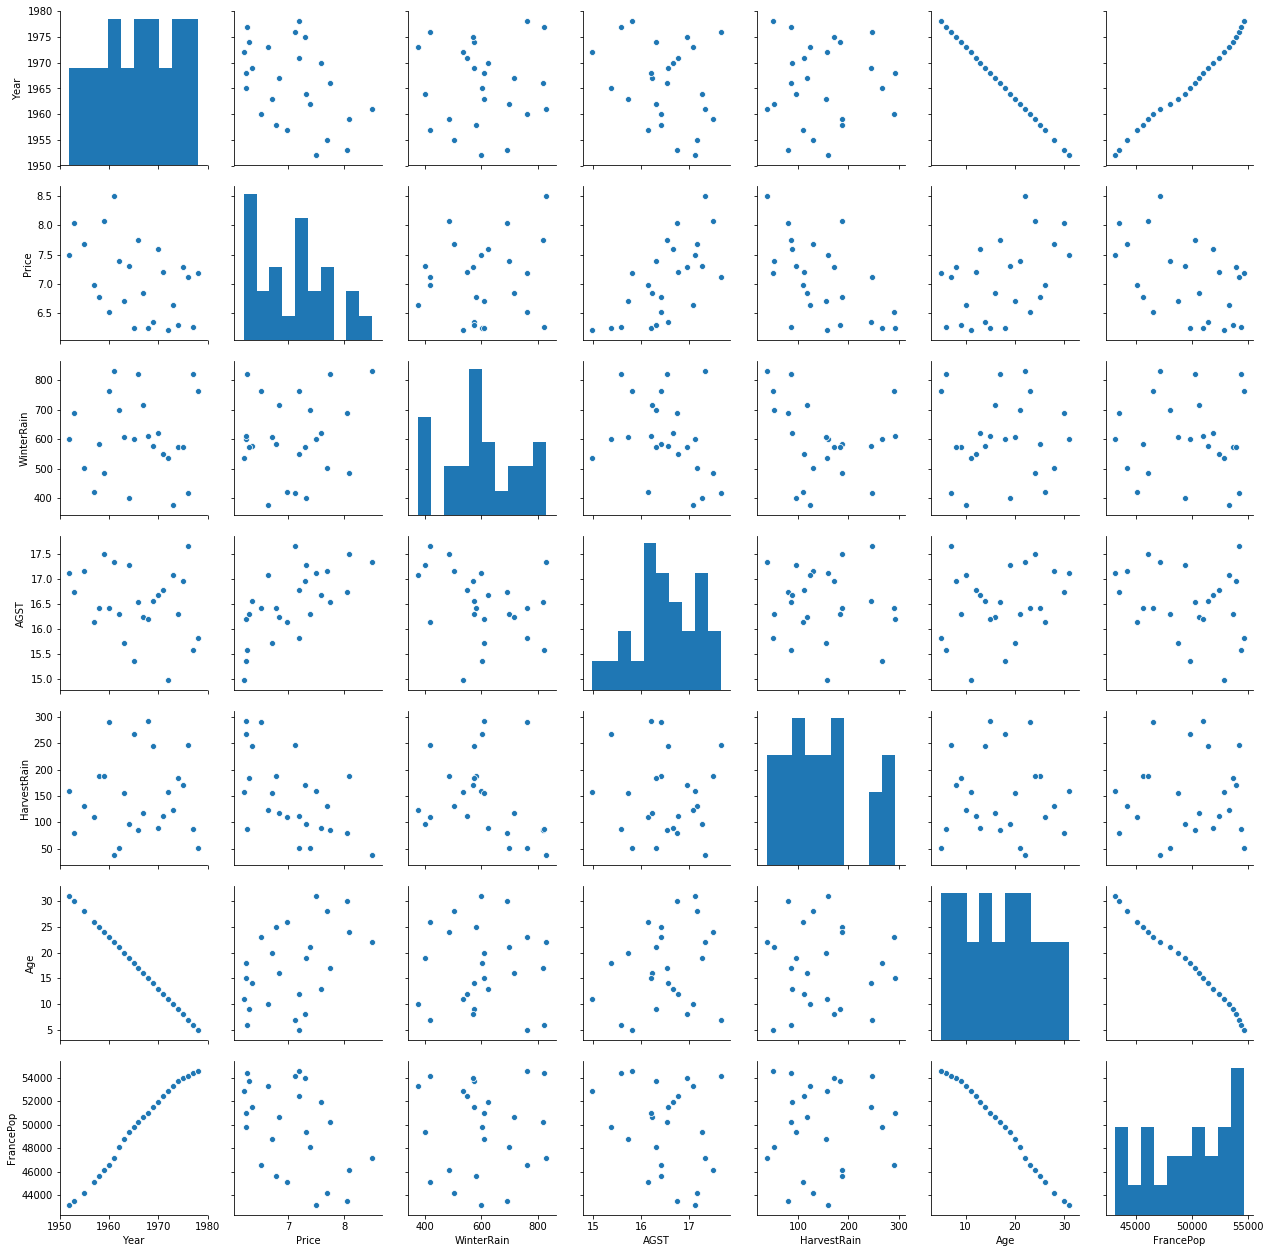

In [0]:
import seaborn as sns
g = sns.pairplot(wine)

Let's Take a look at year and France Population


Text(0, 0.5, 'FrancePop')

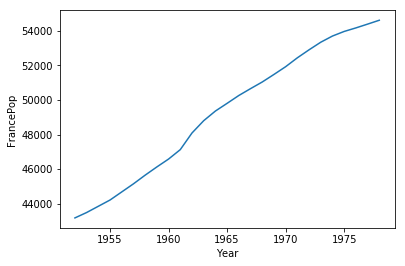

In [0]:
plt.plot(wine["Year"],wine["FrancePop"])
plt.xlabel("Year")
plt.ylabel("FrancePop")

Now we can compute the VIF for age by making a multiple linear regression against age and finding the r-squared value


In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X, y = wine[["WinterRain","AGST","HarvestRain","FrancePop"]],wine.Age
model.fit(X, y)

yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)


0.989714021477421


Now calculated the VIF for Age

In [0]:
VIF = 1/(1-r_squared)
print(VIF)

97.21972467713017
